# Fully Connected NN for Character Recognition Using MNIST Data Set

In [ ]:

#import necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras import layers, models

### Data Loading and splitting

In [4]:
from tensorflow.keras.datasets import mnist
#from tf.keras import datasets
data=mnist.load_data()
(x_train,y_train),(x_test,y_test)=data
print(f'DType Type of train_images{type(x_train)}')
print(f'DType of train_labels{type(y_train)}')
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

DType Type of train_images<class 'numpy.ndarray'>
DType of train_labels<class 'numpy.ndarray'>
(60000, 28, 28)
(60000,)
(10000, 28, 28)


### Dataset sample plot

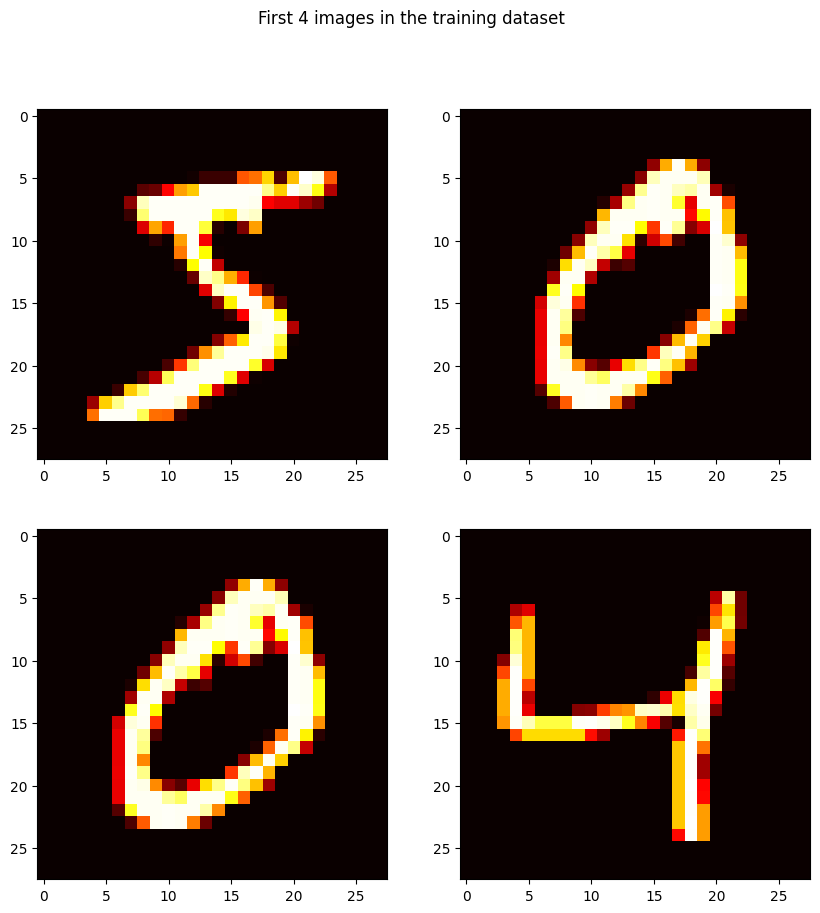

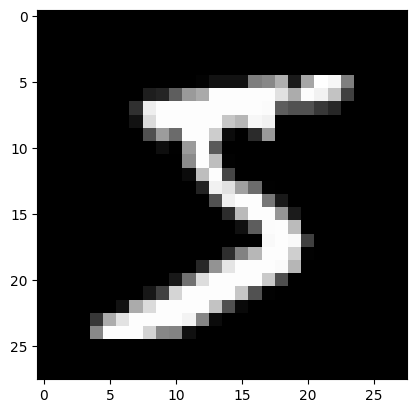

In [7]:

fig1,axs=plt.subplots(2,2,figsize=(10,10))
fig1.suptitle('First 4 images in the training dataset')

fig2,axs1=plt.subplots()
axs1.imshow(x_train[0],cmap='gray')


for i in range (2):
    for j in range(2):
        axs[i,j].imshow(x_train[i+j],cmap='hot')
        
     


### Model Architecture

In [8]:
#Create a model using Sequential API

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model= Sequential(name='MyFirstModel',layers=[tf.keras.Input(shape=(28*28,),batch_size=128),
                                            Dense(200,activation='relu',kernel_initializer='glorot_uniform',bias_initializer='zeros',name='hlayer1'),
                                            Dense(100,activation='relu'),
                                            Dense(10,activation='softmax'),],trainable=True)

model.summary()

Model: "MyFirstModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hlayer1 (Dense)                 │ (128, 200)             │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (128, 100)             │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (128, 10)              │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

### Configures the model for training

1. Compile method-callbacks to save the bestmodel during training

In [13]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model_checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath='model.h5',save_best_only=True,save_weights_only=False,monitor='val_accuracy',mode='max',verbose=0)


2. Transform the labels into the models ouput shape

In [22]:
x_train = x_train.reshape((60000, 28 * 28))/255
x_test = x_test.reshape((10000, 28 * 28))/255

print(x_train.shape)
print(x_test.ndim)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

y_train.shape

(60000, 784)
2


(60000, 10, 10)

2. fit method

In [17]:
# Model is saved at the end of every epoch, if it's the best seen so far.
histary=model.fit(x_train,y_train,callbacks=[model_checkpoint],batch_size=128,epochs=50,validation_split=0.2)


Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9984 - loss: 0.0051 - val_accuracy: 0.9740 - val_loss: 0.1342
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9962 - loss: 0.0107 - val_accuracy: 0.9748 - val_loss: 0.1360
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9962 - loss: 0.0111 - val_accuracy: 0.9767 - val_loss: 0.1422
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9991 - loss: 0.0035 - val_accuracy: 0.9758 - val_loss: 0.1370
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9984 - loss: 0.0046 - val_accuracy: 0.9799 - val_loss: 0.1214
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9993 - loss: 0.0030 - val_accuracy: 0.9760 - val_loss: 0.1381
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9990 - loss: 0.0030 - val_accuracy: 0.9762 - val_loss: 0.1464
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9979 - loss: 0.0075 - val_accuracy: 0.

375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 1.0000 - loss: 8.3601e-05 - val_accuracy: 0.9808 - val_loss: 0.1431
Epoch 31/50
374/375 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 2.7261e-05

375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 1.0000 - loss: 2.7255e-05 - val_accuracy: 0.9808 - val_loss: 0.1435
Epoch 32/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 1.0000 - loss: 2.0121e-05 - val_accuracy: 0.9808 - val_loss: 0.1441
Epoch 33/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 1.0000 - loss: 1.6679e-05 - val_accuracy: 0.9808 - val_loss: 0.1450
Epoch 34/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 1.0000 - loss: 1.4482e-05 - val_accuracy: 0.9808 - val_loss: 0.1454
Epoch 35/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 1.0000 - loss: 1.1325e-05 - val_accuracy: 0.9808 - val_loss: 0.1459
Epoch 36/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 1.0000 - loss: 1.0184e-05 - val_accuracy: 0.9808 - val_loss: 0.1467
Epoch 37/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 1.0000 - loss: 8.7719e-06 - val_accuracy: 0.9808 - val_loss: 0.1475
Epoch 38/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 1.0000 - loss: 6

375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 1.0000 - loss: 4.4319e-06 - val_accuracy: 0.9809 - val_loss: 0.1508
Epoch 42/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 1.0000 - loss: 3.7204e-06 - val_accuracy: 0.9808 - val_loss: 0.1520
Epoch 43/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 1.0000 - loss: 3.3919e-06 - val_accuracy: 0.9808 - val_loss: 0.1530
Epoch 44/50
368/375 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 2.7157e-06

375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 1.0000 - loss: 2.7184e-06 - val_accuracy: 0.9810 - val_loss: 0.1539
Epoch 45/50
372/375 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 2.3311e-06

375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 1.0000 - loss: 2.3319e-06 - val_accuracy: 0.9812 - val_loss: 0.1547
Epoch 46/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 1.0000 - loss: 2.0792e-06 - val_accuracy: 0.9811 - val_loss: 0.1559
Epoch 47/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 1.0000 - loss: 1.7273e-06 - val_accuracy: 0.9809 - val_loss: 0.1570
Epoch 48/50
374/375 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 1.5974e-06

375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 1.0000 - loss: 1.5970e-06 - val_accuracy: 0.9812 - val_loss: 0.1583
Epoch 49/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 1.0000 - loss: 1.3492e-06 - val_accuracy: 0.9812 - val_loss: 0.1590
Epoch 50/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 1.0000 - loss: 1.1590e-06 - val_accuracy: 0.9812 - val_loss: 0.1606


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
[0.9972083568572998, 0.996874988079071, 0.9964374899864197, 0.9993958473205566, 0.9986666440963745, 0.9990416765213013, 0.9983124732971191, 0.9977291822433472, 0.9977499842643738, 0.9982291460037231, 0.999708354473114, 0.9973750114440918, 0.9991041421890259, 0.9983958601951599, 0.9993333220481873, 0.999625027179718, 0.9972291588783264, 0.9981250166893005, 0.9993541836738586, 0.9978958368301392, 0.9986249804496765, 0.999750018119812, 0.9993541836738586, 0.9989374876022339, 0.9985833168029785, 0.9969375133514404, 0.9993541836738586, 0.9995208382606506, 0.999833345413208, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.9972083568572998, 0.996874988079071, 0.9964374899864197, 0.9993958473205566, 0.9986666440963745, 0.9990416765213013, 0.9983124732971191, 0.9977291822433472, 0.9977499842643738, 0.9982291460037231, 0.999708354473114, 0.9973750114440918, 0.9991041421890259, 

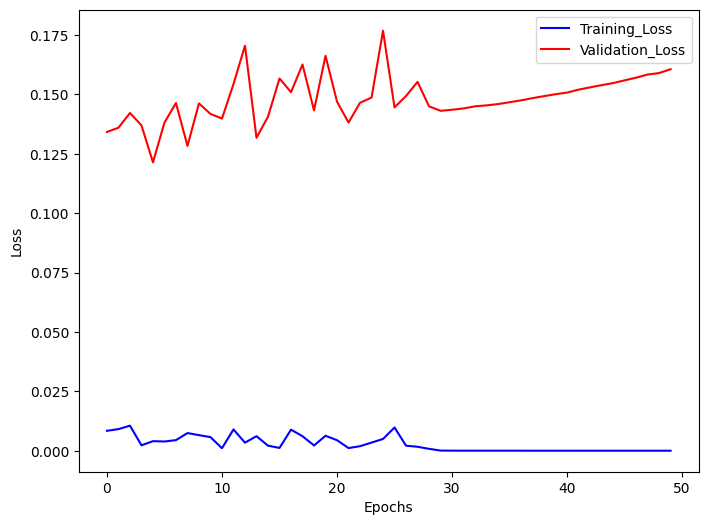

In [18]:
print(histary.history.keys())
print(histary.history['accuracy'])
print(histary.history.get('accuracy'))

train_loss=histary.history['loss']
validation_loss=histary.history['val_loss']
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(train_loss,label='Training_Loss',color='blue')
plt.plot(validation_loss,label='Validation_Loss',color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

3. Evaluate the Model

In [19]:
best_model=models.load_model('model.h5')
best_model.evaluate(x_test,y_test,batch_size=128)

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9803 - loss: 0.1462


[0.12712454795837402, 0.9830999970436096]

In [20]:
test_image=x_test[1]
print(test_image)

test_label=y_test[1]
print(test_label)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.45490196 0.49019608
 0.67058824 1.         1.         0.58823529 0.3

4. Deploy the model

In [21]:
model.predict(test_image.reshape(1,784))
print(np.argmax(model.predict(test_image.reshape(1,784))))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
2
